In [2]:
import numpy as np

with open('data/IRMAR-2017-2018.txt') as f:
    data = f.readlines()

org_catalog = ['AGRO', 'INSA', 'R1', 'R2', 'INRIA', 'EXT', 'ENS', 'CNRS']
pos_catalog = ['PR', 'CR', 'DOC', 'MC', 'DR', 'MC-HDR', 'CR-HDR', 'PE',
               'PDOC', 'ADMG', 'TC', 'IR', 'IE', 'AI', 'AGPREP', 'ATER,DOC',
               'ADMG', 'ADM-UFR', 'PRAG', 'CH', 'ADMP', 'CH-HDR', 'ATER', 'LOG']

names, phones, offices, orgs, positions, teams = [], [], [], [], [], []
for m, line in enumerate(data):

    member = line.strip()
    i = member.index('+')
    name = member[:i]
    names.append(name)
    phones.append(member[i:i+17].replace(' ',''))
    remind = member[i+17:].split()
    office = 'NA'
    organization = 'R1'
    team = ['NA']

    # office
    if remind[0].isdigit() or '/' in remind[0]:
        offices.append(remind[0])
        office = remind[0]
        remind.pop(0)
    else:
        offices.append('NA')

    # organization
    if len(remind) > 0 and remind[0] in org_catalog:
        orgs.append(remind[0])
        organization = remind[0]
        remind.pop(0)
    else:
        orgs.append('R1')

    # position
    if len(remind) > 0 and remind[0] in pos_catalog:
        positions.append(remind[0])
        position = remind[0]
        remind.pop(0)
    else:
        position = 'NA'
        positions.append('NA')

    # team
    if len(remind) > 0:
        team = remind[-1].split(',')
        if len(team) == 2:
            teams.append(tuple(team))
        else:
            teams.append(tuple(team+['NA']))
    else:
        teams.append(('ADM','NA'))

irmar = np.zeros(len(data),
dtype={'names': ['name', 'phone', 'office', 'organization', 'position', 'hdr', 'team1', 'team2'],
       'formats': ['U30', 'U17', 'U7', 'U5', 'U6', '?', 'U9', 'U9']})

In [3]:
irmar['name'] = names
irmar['phone'] = phones
irmar['office'] = offices
irmar['organization'] = orgs

def _hdr(position):
    return any(x in position for x in ['HDR','PR','DR','PE'])
    
irmar['hdr'] = [ _hdr(position) for position in positions]
irmar['position'] = [position.replace('-HDR','') for position in positions]
irmar['team1'] = [team[0] for team in teams]
irmar['team2'] = [team[1] for team in teams]

In [4]:
import pandas as pd
df = pd.DataFrame(irmar)
df['position'] = df.position.astype('category')
df['team1'] = df.team1.astype('category')
df['team2'] = df.team2.astype('category')
df['organization'] = df.organization.astype('category')
df['hdr'] = df.hdr.astype('bool')

- Combien d'enseignants-chercheurs habilités à diriger des recherches ?

In [5]:
len(df[df.hdr])

103

- Combien d'enseignants-chercheurs de Rennes 2 ?

In [6]:
len(df[df.organization == 'R2'])

11

In [7]:
df.loc[df['name'].str.contains("Guevel")]

,name,phone,office,organization,position,hdr,team1,team2
142,Le Guevel Ronan,+33299141800,NA,R2,MC,False,PROC-STOC,STAT


- Liste des MC de l'équipe STATS

In [13]:
df.loc[df.position == 'MC'].loc[(df.team1 == 'STAT') | (df.team2 == 'STAT')]

,name,phone,office,organization,position,hdr,team1,team2
17,Bennani-Dosse Mohammed,+33299141796,NA,R2,MC,False,STAT,NA
42,Chagneau Pierrette,+33223238528,NA,INSA,MC,False,STAT,NA
46,Chauvet Guillaume,+33299053233,NA,R1,MC,True,STAT,NA
55,Cornillon Pierre-André,+33299141819,NA,R2,MC,False,STAT,NA
83,Emily Mathieu,+33299141807,121,R1,MC,True,STAT,NA
85,Etienne Marie-Pierre,+33223485874,NA,R1,MC,False,STAT,NA
93,Gares Valérie,+33223238948,NA,INSA,MC,False,STAT,NA
96,Giacofci Joyce Madison,+33299141800,NA,R2,MC,False,STAT,NA
130,Klutchnikoff Nicolas,+33299141819,NA,R2,MC,False,STAT,NA
131,Krell Nathalie,+33223236000,305,R1,MC,False,STAT,NA


- Pourcentage d'EC non doctorants habilités

In [14]:
df.loc[df.position != 'DOC'].hdr.sum()/df.loc[df.position != 'DOC'].hdr.count()*100

56.59340659340659

In [15]:
res = pd.DataFrame()
for position in ['DOC','PR','MC','CR','DR']:
    res[position] = df.loc[df.position == position].groupby('team1').name.count()

In [16]:
res = res.drop(['INFO','IREM','BIBLI','ADM'])

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

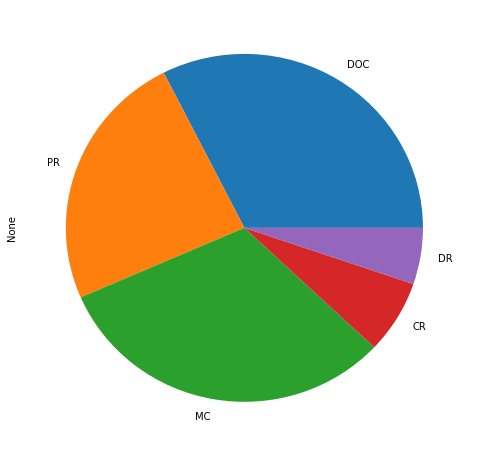

In [34]:
res.sum().plot.pie(figsize=(8, 8))

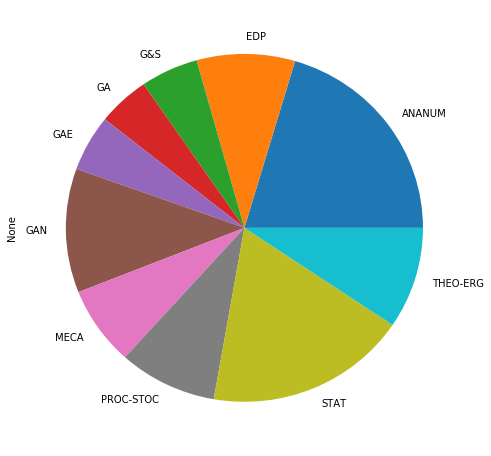

In [39]:
res.sum(axis=1).plot.pie(figsize=(8, 8))

- Nombre de maitres de conférence

In [26]:
df['name'].loc[df.position == 'MC'].count()

62